In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [67]:
np.random.seed(0)

In [68]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # 60000 image (28 x 28 array)
print(X_test.shape) # 10000 image (28 x 28 array)
print(y_train.shape) # 60000 labels for 60000 images
print(y_test.shape)

# a code should be put in to debug before process lower codes
assert(X_train.shape[0] == y_train.shape[0]) # if the code does not meet the condition, it will return error and now execute anymore codes
assert(X_test.shape[0] == y_test.shape[0]) # The number of images must equals to number of labels.
assert(X_train.shape[1:] == (28, 28)) # image size must be 28 x 28
assert(X_test.shape[1:] == (28, 28)) 

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


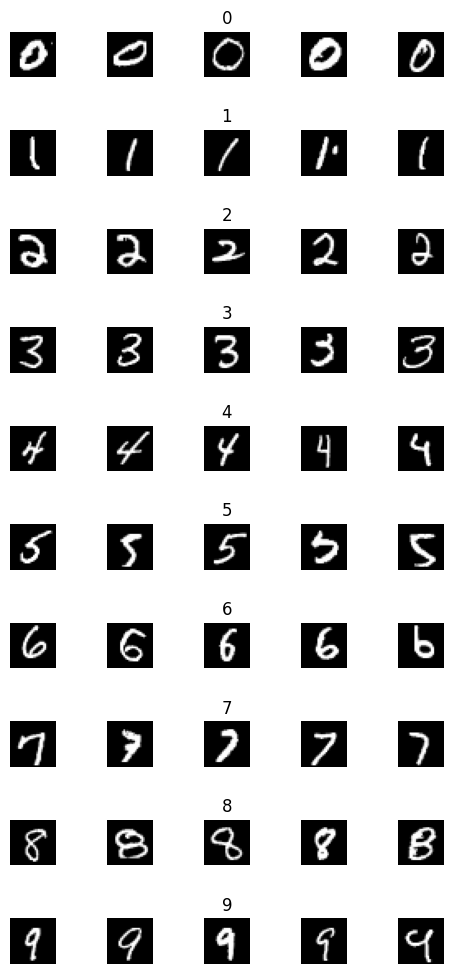

In [69]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(
    nrows = num_classes,
    ncols = cols,
    figsize = (5, 10)
)

fig.tight_layout()

for i in range(cols): 
    for j in range(num_classes): # j goes from 0 to 9
        x_selected = X_train[y_train == j] # only get images that has label of current j (0)
        
        # we have selected all the images of label j, but we only need one of them
        random_img_idx = random.randint(0, len(x_selected) - 1) # random image index

        currentSubPlot = axs[j][i] # j first then i since rows must come first in 2d array
        currentSubPlot.imshow(
            x_selected[
                random_img_idx, 
                :, : # keep the fullsize of the 2D array (image) currently: (28 x 28)
            ], 
            cmap=plt.get_cmap("gray") # since default cmap of plt is verderis
        )

        currentSubPlot.axis("off")

        # set title in the middle
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected)) # we only do this 1 time each rows when i = 2

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

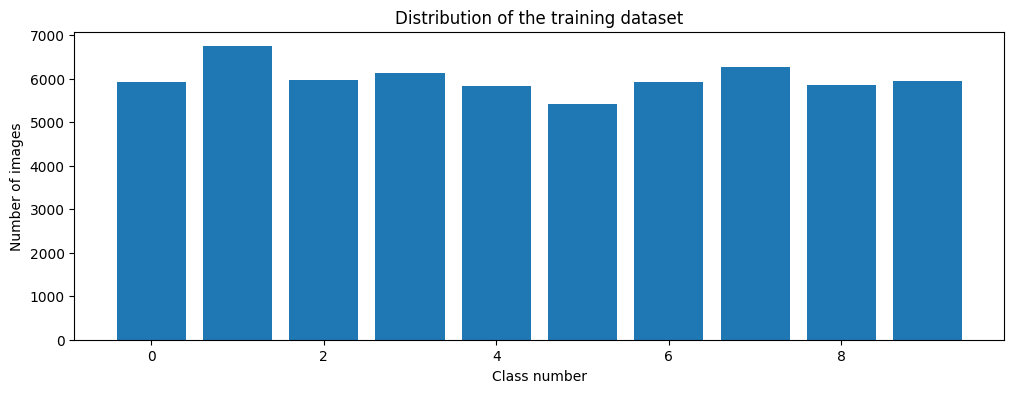

In [70]:
print(num_of_samples)
# as we can see, there are 5923 samples of label 0, 6742 samples of label 1, ....
# seeing just the numbers wont be enough, we need to visualize it

plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [71]:
# ------------- one hot encoding (for labels) ------------
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [72]:
# ------------ "Normalization" --------------------  
X_train = X_train/255
X_test = X_test/255

In [73]:
# before putting images into the CONVOLUTION neural network
# we DON'T FLATTEN the images, that only for REGULAR neural network
# since we use KERNEL in conv nerwork to SCAN THE CHANNELS of the images (input)
# and incase of GRAY SCALE image, there only ONE channel to SCAN, 
# ---> so we need to add DEPTH to our inputs.

# testing with 3: 4x4 images 
temp_test = np.array(
    [
        [
            [1, 1, 1, 1],
            [1, 1, 1, 1],
            [1, 1, 1, 1],
            [1, 1, 1, 1]
        ], 
        [
            [1, 1, 1, 1],
            [1, 1, 1, 1],
            [1, 1, 1, 1],
            [1, 1, 1, 1]
        ], 
        [
            [1, 1, 1, 1],
            [1, 1, 1, 1],
            [1, 1, 1, 1],
            [1, 1, 1, 1]
        ]
    ]
)

print(temp_test.shape)

# we must reshape this 4x4 created 2d array into how real image would shape
temp_test = temp_test.reshape(3, 4, 4, 1) 
temp_test

# so it just add ONE MORE "[]" out side the number "1"
# and that's how image is structure
# look at the first "image",
# the only ONE LAYER is the whole  horizontal column that has bunch of number "1"
# and since this "image" is 4x4, so only the first 4 number "[1]" are contained in an array.

(3, 4, 4)


array([[[[1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         [1]]],


       [[[1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         [1]]],


       [[[1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         [1]]]])

In [74]:
# we'll gonna reshape training datas into how real image would structure
# in this case ony 1 layer since they are grayscaled
X_train = X_train.reshape(60000, 28, 28, 1)
X_test =  X_test.reshape(10000, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [75]:
# create lenet model (conv neural network)
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [76]:
def leNet_model():
    model = Sequential()
    # first conv layer
    # output shape: 24x24 (28 - 4)
    model.add(Conv2D(
        filters=30, # 30 filters in conv layer is like 30 nodes in a hidden layer --> outputs are 30 features map for each input
        kernel_size=(5, 5), # 5 x 5 = 25 adjustable params each filter --> thus 25 x 30 = 750 params total in this conv layer, and 750 + 30 bias params = 780 
        input_shape=(28, 28, 1), # 1 channel image shape
        activation='relu', # an activation function designed for output image after filtering (just like weighted sum in perceptron) --> we got a feature map as output
        strides=1, # default will be "1" if we don't specify here
        padding='valid' # 3 types: 'valid padding', 'casual padding', 'same padding' - the default will be 'valid' means no padding will be used
    ))

    # pooling layer
    # only one param is the kernel size 2x2
    # with 2x2 kernel, and default stride = 2 
    # the feature maps (above outputs) is scaled down to half its size
    # outputs are still 30 features map with 1/2 original size.
    # output shape: 24 / 2 = 12
    model.add(MaxPooling2D(pool_size=(2, 2))) 

    # for this layer, we'll gonna use fewer filters 
    # for the purpose of minimizing the computation power
    # we'll dealing with higher number of params.
    # this is due to the fact that the OUTPUTS from pooling layer (above) is 30.
    # 30 outputs go into this conv layer as inputs and there are 15 filters in this conv layer, 
    # each filter must be applied to each 30 outputs
    # and each filter in 15 filters has a bias param
    # so total params = 30 x 15 x (3 x 3) + 15 = 4065 
    # output shape: 12 - 2 = 10
    model.add(Conv2D(
        filters=15,
        kernel_size=(3, 3), # since at this point the image is scaled down way smaller, use smaller filter
        activation='relu'
    ))

    # still cut the dimension in half
    # output shape: 10 / 2 = 5
    model.add(MaxPooling2D(pool_size=(2,2)))

    # fully connected layer
    model.add(Flatten()) # flattening all the output from pooling layer to make as inputs for regular neural network
    model.add(Dense(units=500, activation= 'relu')) 
    # drop out layer is used between layers that have high number of params
    # because these high params layer are more likely to overfit the training datas
    # that's why we should put between fully connected layer
    # rate = 0 means no nodes are drop, 1 all nodes are drop
    # 0.5 is the recommended rate by researcher
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=num_classes, activation='softmax')) # output layer
    model.compile(optimizer= Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [77]:
model = leNet_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 15)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 375)               0         
                                                                 
 dense_10 (Dense)            (None, 500)              

In [78]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=400,
    verbose=1,
    shuffle=1
)

Epoch 1/10
135/135 [==============================] - 2s 8ms/step - loss: 0.2330 - accuracy: 0.9263 - val_loss: 0.0498 - val_accuracy: 0.9840
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0693 - accuracy: 0.9781 - val_loss: 0.0416 - val_accuracy: 0.9883
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.0423 - val_accuracy: 0.9867
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0305 - val_accuracy: 0.9915
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0353 - val_accuracy: 0.9908
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.0356 - val_accuracy: 0.9910
Epoch 

Text(0.5, 0, 'epoch')

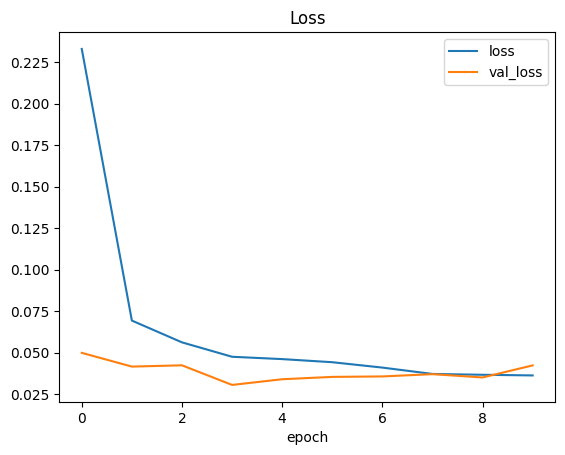

In [79]:
plt.plot(history.history['loss']) # loss / error
plt.plot(history.history['val_loss']) # validation loss / error
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

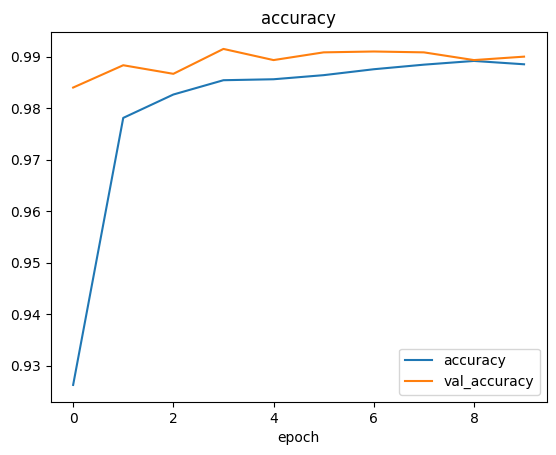

In [80]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

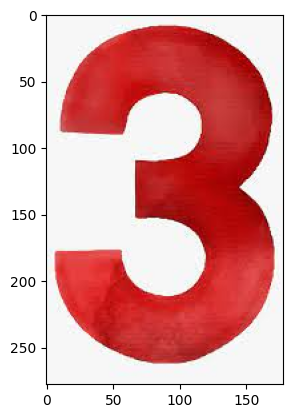

In [81]:
# let's try with prediction with an image
import requests
from PIL import Image

img = Image.open('./tut5_mnist_datasets/3.png')
plt.imshow(img, cmap=plt.get_cmap('gray'))

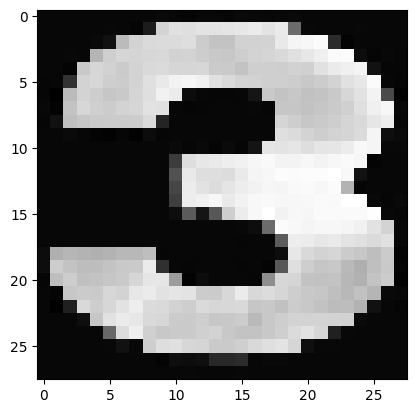

In [82]:
# --> need to convert it into 28x28 and only 1 channel
import cv2

img_array = np.asarray(img) # simply convert the input into an array
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# but the neural network was trained on inputs that have black background and white lines (handraw)
# so we're gonna have to invert the colors too
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [83]:
# before putting into the convolutional neural network

image = image/255 # normalization
image = image.reshape(1, 28, 28, 1) 
# --> [[image]] conv neural network only accept [[input1], [input2], [input3]]

In [84]:
# for multi classes
def predict_classes (inputs, model):
    pred = model.predict(inputs) 
    return np.argmax(pred,axis=1) 

pred = predict_classes(image, model)
print('predicted digit: ', str(pred))

1/1 [==============================] - 0s 86ms/step
predicted digit:  [3]


In [85]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test error (Test score): ', score[0]) # this is TEST error because we evaluating on the X_test and y_test
print('Test accuracy:', score[1])

Train error (the score its self):  0.03924684599041939
Train accuracy: 0.9883999824523926


In [86]:
# visualizeing the layer outputs -----------------------------------------------------
from keras.models import Model

In [89]:
# 1st convolutional layer
first_conv_layer = model.layers[0] 

# for visualizing
layer1 = Model(
    inputs=first_conv_layer.input, # in this case, the input is simply the image passed into the network    
    outputs=first_conv_layer.output,
)

# 2nd convolutional layer
second_conv_layer = model.layers[2]

layer2 = Model(
    inputs=first_conv_layer.input, # in this case, the input is simply the image passed into the network    
    outputs=second_conv_layer.output
)

# the beauty of the Model API is that:
# it will calculate from the input -- to the --> output
# using the same weight of the trained model

In [90]:
# so when we use each layer to predict, it will show the results that each layer "is seeing"

layer1.predict(image)

1/1 [==============================] - 0s 50ms/step


array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.6632935 ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.54311144],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.16080108]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.3

In [92]:
# to get a better visualizing instead of just intensity values

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 [==============================] - 0s 19ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


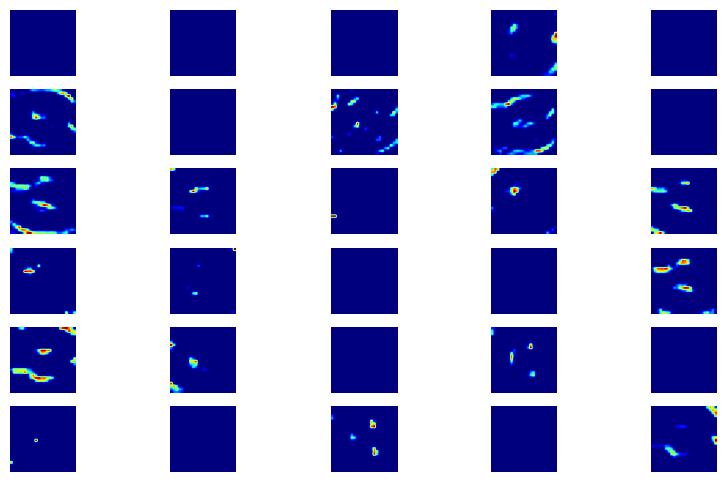

In [93]:
plt.figure(figsize=(10, 6))

# the first layer has 30 filters --> we expect 30 plots

for i in range(30):
    # plot in a grid-like pattern, 6 rows x 5 cols = 30 sub plots -----------
    # plt will get the subplot ...
    # ... that take the index position on a grid with nrows rows and ncols columns
    # index start with 1 
    plt.subplot(6, 5, i+1)
    # showing the image on current subplot -------------
    # the shape of visual_layer1 is (1, 24, 24, 30)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off') # hiding axis 

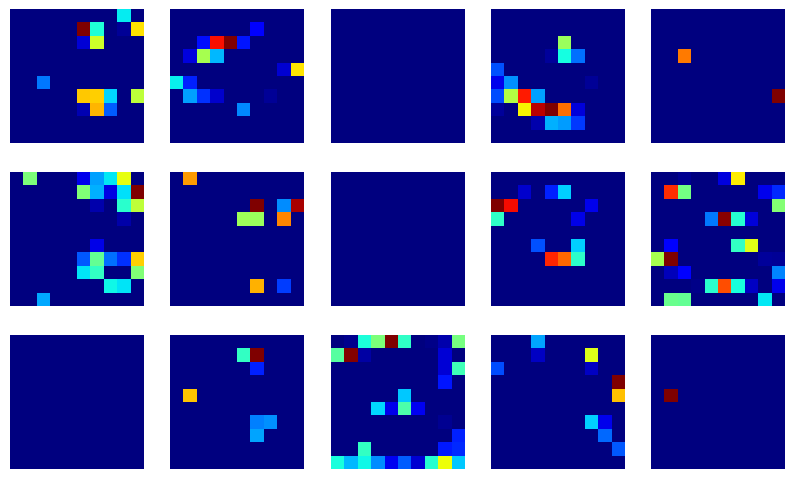

In [94]:
plt.figure(figsize=(10, 6))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off') 